In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
#data = pd.read_excel("ByteCrunchRound2_ISBAdvaita20221.xlsx")
#data.to_pickle("pre-diwali-pickled")

In [3]:
df = pd.read_pickle("pre-diwali-pickled")
df.head()

,DATE,SHOP_ID,PINCODE,SHOP,ITEM_ID,HR of the day,ORDERS,QTY,ITEM_GMV,CATEGORY
0,2019-10-17,132734.0,401255.0,vaibhav Cell phones,41440860.0,441.0,1.0,1.0,1000.0,Charger
1,2019-10-12,179292.0,400079.0,Ganpati Cell phones,40191841.0,357.0,1.0,2.0,1200.0,Mobiles
2,2019-10-17,192693.0,400068.0,ADARSH LAPTOP Shop,41574322.0,315.0,1.0,1.0,1000.0,Earphones
3,2019-10-10,153638.0,400658.0,Madan JI Repair,36868884.0,210.0,1.0,1.0,3600.0,Earphones
4,2019-10-10,82759.0,400105.0,SHRI SANGEETHAS,37385563.0,399.0,1.0,1.0,800.0,Mobiles


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187678 entries, 0 to 187677
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   DATE           187677 non-null  datetime64[ns]
 1   SHOP_ID        187677 non-null  float64       
 2   PINCODE        187677 non-null  float64       
 3   SHOP           187677 non-null  object        
 4   ITEM_ID        187677 non-null  float64       
 5   HR of the day  187677 non-null  float64       
 6   ORDERS         187677 non-null  float64       
 7   QTY            187677 non-null  float64       
 8   ITEM_GMV       187678 non-null  float64       
 9   CATEGORY       187677 non-null  object        
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 14.3+ MB


<AxesSubplot:xlabel='HR of the day', ylabel='Count'>

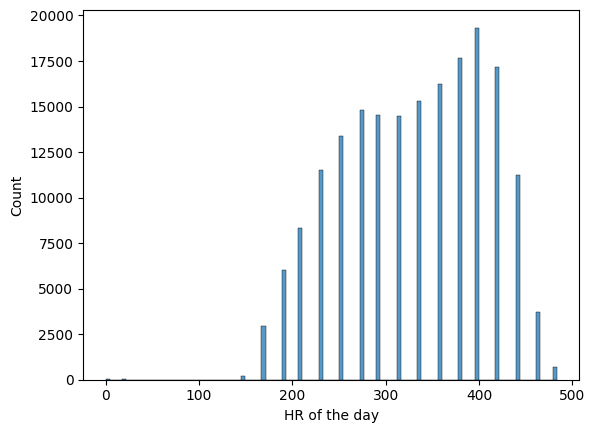

In [55]:
sns.histplot(df['HR of the day'])

In [5]:
df[df['DATE'].isnull()]

,DATE,SHOP_ID,PINCODE,SHOP,ITEM_ID,HR of the day,ORDERS,QTY,ITEM_GMV,CATEGORY
187677,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.093254e+08,NaN


In [6]:
df.dropna(inplace=True)

In [7]:
tot_ord = df['ORDERS'].sum()
tot_gmv = df['ITEM_GMV'].sum()

print("Total orders: %d" % int(tot_ord))
print("Total GMV is: %f crores" % (tot_gmv/10000000))

Total orders: 241585
Total GMV is: 30.932545 crores


In [8]:
loc = ['PINCODE','SHOP_ID','SHOP']

for i in loc:
    val = df[i].nunique()
    print("{} has {} unique values".format(i,val))

PINCODE has 259 unique values
SHOP_ID has 1097 unique values
SHOP has 965 unique values


In [9]:
df['CATEGORY'].value_counts()

Mobiles      83759
Earphones    53892
Tablets      27400
Speakers      7310
Laptops       5654
TV            5311
Charger       4351
Name: CATEGORY, dtype: int64

In [10]:
df.head()

,DATE,SHOP_ID,PINCODE,SHOP,ITEM_ID,HR of the day,ORDERS,QTY,ITEM_GMV,CATEGORY
0,2019-10-17,132734.0,401255.0,vaibhav Cell phones,41440860.0,441.0,1.0,1.0,1000.0,Charger
1,2019-10-12,179292.0,400079.0,Ganpati Cell phones,40191841.0,357.0,1.0,2.0,1200.0,Mobiles
2,2019-10-17,192693.0,400068.0,ADARSH LAPTOP Shop,41574322.0,315.0,1.0,1.0,1000.0,Earphones
3,2019-10-10,153638.0,400658.0,Madan JI Repair,36868884.0,210.0,1.0,1.0,3600.0,Earphones
4,2019-10-10,82759.0,400105.0,SHRI SANGEETHAS,37385563.0,399.0,1.0,1.0,800.0,Mobiles


## Date wise comparison

In [11]:
by_date = df.groupby('DATE').sum()[['ORDERS','ITEM_GMV']]
by_date['ITEM_GMV (crores)'] = np.round(by_date['ITEM_GMV']/10000000,decimals=3)
by_date['% TOT ORD'] = np.round(by_date['ORDERS']/2415.85,decimals=2)
by_date['% TOT GMV'] = np.round(by_date['ITEM_GMV']*100/df['ITEM_GMV'].sum(),decimals=2)
by_date.drop(['ORDERS','ITEM_GMV'],axis=1)

,ITEM_GMV (crores),% TOT ORD,% TOT GMV
DATE,,,
2019-10-10,3.470,11.52,11.22
2019-10-11,3.353,11.16,10.84
2019-10-12,3.997,13.25,12.92
2019-10-13,4.744,16.01,15.34
2019-10-14,3.036,9.87,9.81
2019-10-15,3.433,11.06,11.10
2019-10-16,3.796,11.89,12.27
2019-10-17,5.103,15.23,16.50


<AxesSubplot:ylabel='ITEM_GMV'>

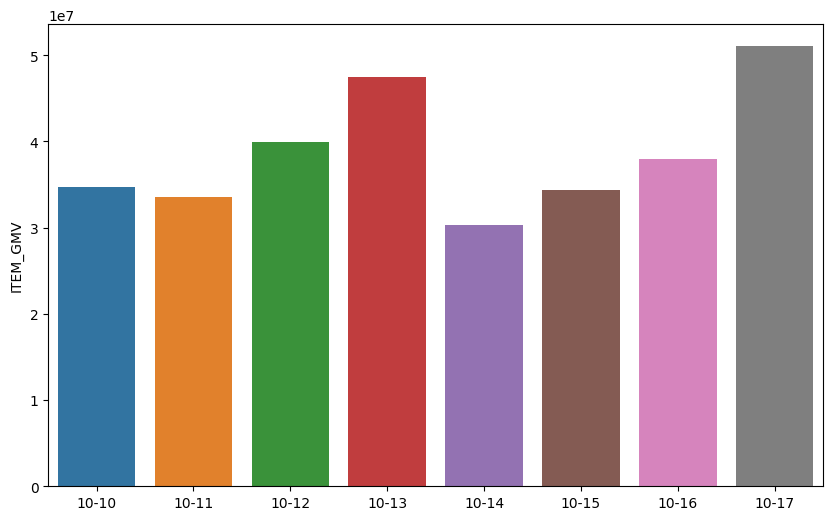

In [12]:
dates = []

for date in by_date.index :
    dates.append(str(date)[-14:-9])

plt.figure(figsize=(10,6))
sns.barplot(x=dates,y=by_date.ITEM_GMV)

<AxesSubplot:ylabel='ORDERS'>

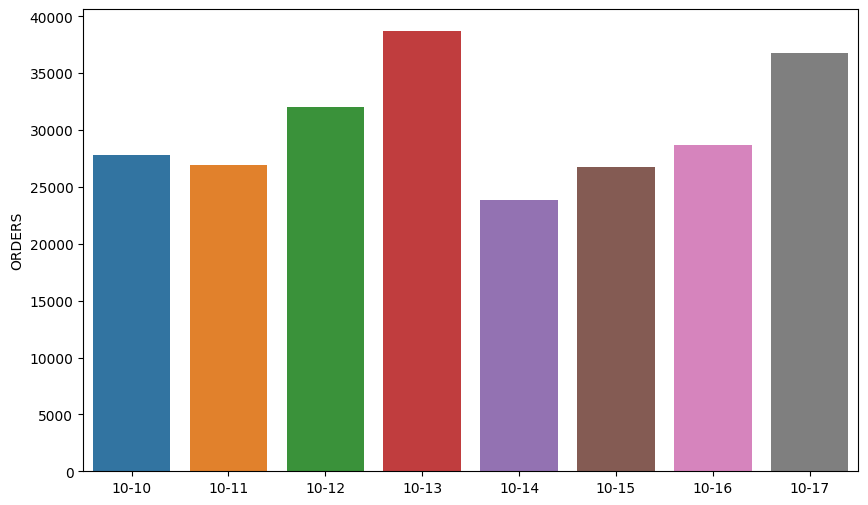

In [13]:
plt.figure(figsize=(10,6))
sns.barplot(x=dates,y=by_date.ORDERS)

## Category wise comparison

In [14]:
by_cat = df.groupby('CATEGORY').sum()[['ORDERS','ITEM_GMV']].sort_values(['ITEM_GMV'],ascending=False)
by_cat['ITEM_GMV (crores)'] = np.round(by_cat['ITEM_GMV']/10000000,decimals=3)
by_cat['% Total ORD'] = np.round(by_cat['ORDERS']/3634.45,decimals=3)
by_cat['% TOT GMV'] = np.round(by_cat['ITEM_GMV']*100/df['ITEM_GMV'].sum(),decimals=6)
by_cat.drop(['ORDERS','ITEM_GMV'],axis=1)

,ITEM_GMV (crores),% Total ORD,% TOT GMV
CATEGORY,,,
Mobiles,11.331,29.182,36.631727
Earphones,11.018,19.818,35.620270
Tablets,4.520,9.349,14.613694
Speakers,1.326,2.526,4.285744
Laptops,1.188,2.048,3.841069
TV,0.833,1.974,2.693782
Charger,0.716,1.575,2.313715


<AxesSubplot:title={'center':'Pre-Diwali Sales'}, ylabel='% TOT GMV'>

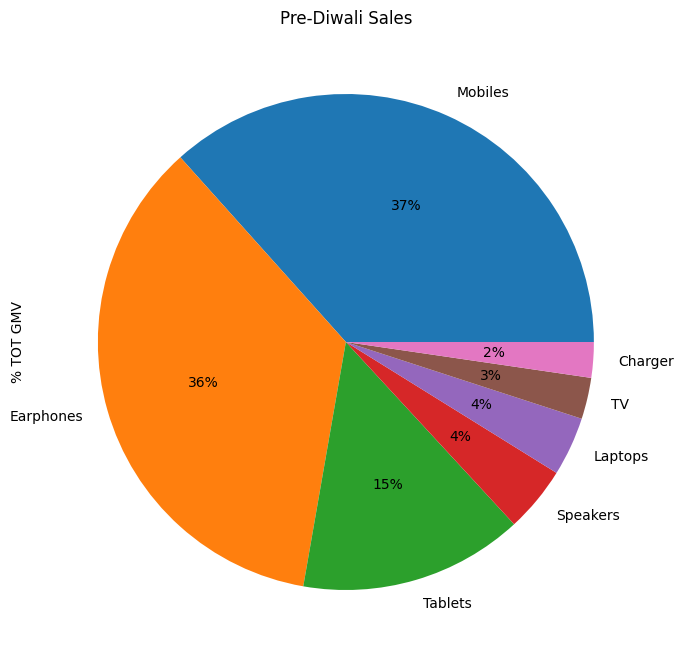

In [15]:
by_cat.plot(kind='pie',y='% TOT GMV',legend=False, autopct='%1.0f%%', figsize=(8,18), title='Pre-Diwali Sales')

In [16]:
#by_cat.plot(kind='pie',y='% TOT ORD',legend=False)

## Shop wise comparison

In [48]:
by_shop = df.groupby('SHOP').sum()[['ORDERS','ITEM_GMV']].sort_values(['ITEM_GMV'],ascending=False)
by_shop['% TOT ORD'] = np.round(by_shop['ORDERS']/2415.85,decimals=2)
by_shop['% TOT GMV'] = np.round(by_shop['ITEM_GMV']*100/df['ITEM_GMV'].sum(),decimals=6)
by_shop['GMV CUM'] = np.round(by_shop['% TOT GMV'].cumsum(axis=0),decimals=3)
by_shop

,ORDERS,ITEM_GMV,% TOT ORD,% TOT GMV,GMV CUM
SHOP,,,,,
Samsung & Apple's,5968.0,1.158309e+07,2.47,3.744630,3.745
SS ELECTRONICS(Tripolis),4964.0,1.145388e+07,2.05,3.702857,7.447
Kiranshree Cell phones & Speakers,5207.0,8.168113e+06,2.16,2.640621,10.088
Manohar ELECTRONICS and Tablets,5285.0,7.026187e+06,2.19,2.271455,12.360
Indian's Cell phones,4700.0,6.195390e+06,1.95,2.002871,14.362
...,...,...,...,...,...
Sree Mahendra Phone & Cell phones,1.0,1.000000e+03,0.00,0.000323,99.999
ELECTRONICS Shivganga,1.0,1.000000e+03,0.00,0.000323,99.999
Bombay ELECTRONICS Gh road,1.0,8.000000e+02,0.00,0.000259,100.000


In [18]:
by_shop[by_shop['GMV CUM']<25].drop(['ORDERS','ITEM_GMV'],axis=1)

,% TOT ORD,% TOT GMV,GMV CUM
SHOP,,,
Samsung & Apple's,2.47,3.744630,3.745
SS ELECTRONICS(Tripolis),2.05,3.702857,7.447
Kiranshree Cell phones & Speakers,2.16,2.640621,10.088
Manohar ELECTRONICS and Tablets,2.19,2.271455,12.360
Indian's Cell phones,1.95,2.002871,14.362
SHRI SANGEETAS,2.23,1.914883,16.277
Kaveri - Lalpur,1.13,1.686088,17.963
Kipps Cell phones (Rajendra Nagar),1.29,1.622170,19.586
Pathak Tablets,1.27,1.585999,21.172


In [19]:
# by_shop[by_shop['GMV CUM']<26].drop(['ORDERS','ITEM_GMV'],axis=1).to_csv("GMV grouped by Shop.csv")

## Location wise comparison

In [47]:
by_pin = df.groupby('PINCODE').sum()[['ORDERS','ITEM_GMV']].sort_values(['ITEM_GMV'],ascending=False)
by_pin['% TOT ORD'] = np.round(by_pin['ORDERS']/2415.85,decimals=3)
by_pin['% TOT GMV'] = np.round(by_pin['ITEM_GMV']*100/df['ITEM_GMV'].sum(),decimals=6)
by_pin['GMV CUM'] = np.round(by_pin['% TOT GMV'].cumsum(axis=0),decimals=3)
by_pin

,ORDERS,ITEM_GMV,% TOT ORD,% TOT GMV,GMV CUM
PINCODE,,,,,
400058.0,30183.0,3.334286e+07,12.494,10.779218,10.779
400102.0,12838.0,1.956941e+07,5.314,6.326479,17.106
400120.0,10875.0,1.902334e+07,4.502,6.149943,23.256
400131.0,8917.0,1.214173e+07,3.691,3.925229,27.181
400091.0,10833.0,1.056979e+07,4.484,3.417046,30.598
...,...,...,...,...,...
412263.0,2.0,5.400000e+03,0.001,0.001746,99.996
412155.0,9.0,4.400000e+03,0.004,0.001422,99.998
410560.0,2.0,3.450000e+03,0.001,0.001115,99.999


In [21]:
by_pin[by_pin['GMV CUM']<51].drop(['ORDERS','ITEM_GMV'],axis=1)

,% TOT ORD,% TOT GMV,GMV CUM
PINCODE,,,
400058.0,12.494,10.779218,10.779
400102.0,5.314,6.326479,17.106
400120.0,4.502,6.149943,23.256
400131.0,3.691,3.925229,27.181
400091.0,4.484,3.417046,30.598
400105.0,3.735,3.303433,33.901
400122.0,2.568,3.056640,36.958
400118.0,2.706,2.874353,39.832
400052.0,2.309,2.526614,42.359


In [22]:
df['PINCODE'].describe()

count    187677.000000
mean     402068.247041
std        5451.196738
min      400049.000000
25%      400080.000000
50%      400118.000000
75%      400144.000000
max      421653.000000
Name: PINCODE, dtype: float64

In [23]:
#post_data = pd.read_excel("ByteCrunchRound2_ISBAdvaita20221.xlsx",sheet_name=1)
#post_data.head()

In [24]:
#post_data.to_pickle("post-diwali-pickled")
#post_df = pd.read_pickle("post-diwali-pickled")
#post_df.head()

## Category sales across dates

In [25]:
# Calculating category wise GMV percentage for each row
PCT_TOT_GMV = []

Charger = df.groupby('CATEGORY').sum().loc['Charger']['ITEM_GMV']
Mobiles = df.groupby('CATEGORY').sum().loc['Mobiles']['ITEM_GMV']
Earphones = df.groupby('CATEGORY').sum().loc['Earphones']['ITEM_GMV']
Laptops = df.groupby('CATEGORY').sum().loc['Laptops']['ITEM_GMV']
Tablets = df.groupby('CATEGORY').sum().loc['Tablets']['ITEM_GMV']
Speakers = df.groupby('CATEGORY').sum().loc['Speakers']['ITEM_GMV']
TV = df.groupby('CATEGORY').sum().loc['TV']['ITEM_GMV']

for i in range(df['ORDERS'].size):
    val = 0
    if df['CATEGORY'][i]=='Mobiles':
        val=Mobiles
    elif df['CATEGORY'][i]=='Earphones':
        val=Earphones
    elif df['CATEGORY'][i]=='Tablets':
        val=Tablets
    elif df['CATEGORY'][i]=='Speakers':
        val=Speakers
    elif df['CATEGORY'][i]=='Laptops':
        val=Laptops
    elif df['CATEGORY'][i]=='TV':
        val=TV
    else :
        val=Charger        
    PCT_TOT_GMV.append(val)

# making a column for category wise GMV percentage
df['% CAT GMV'] = np.round((df['ITEM_GMV']*100)/PCT_TOT_GMV,decimals=6)

In [26]:
by_cat_date = df.groupby(['CATEGORY','DATE']).sum()[['ITEM_GMV','% CAT GMV']]
by_cat_date

ITEM_GMV  % CAT GMV
CATEGORY  DATE                               
Charger   2019-10-10  9.107412e+05  12.725371
          2019-10-11  9.048541e+05  12.643136
          2019-10-12  1.082488e+06  15.125126
          2019-10-13  1.174773e+06  16.414581
          2019-10-14  6.830593e+05   9.544095
          2019-10-15  7.702152e+05  10.761886
          2019-10-16  7.965995e+05  11.130534
          2019-10-17  8.341776e+05  11.655623
Earphones 2019-10-10  1.176683e+07  10.679448
          2019-10-11  1.168907e+07  10.608910
          2019-10-12  1.349344e+07  12.246572
          2019-10-13  1.562034e+07  14.176917
          2019-10-14  1.017447e+07   9.234260
          2019-10-15  1.174045e+07  10.655558
          2019-10-16  1.379458e+07  12.519829
          2019-10-17  2.190338e+07  19.879252
Laptops   2019-10-10  1.204150e+06  10.134759
          2019-10-11  1.083802e+06   9.121864
          2019-10-12  1.374140e+06  11.565503
          2019-10-13  1.675635e+06  14.103031
          2019-10-14  1.044636e+06   8.792218
          2019-10-15  1.273631e+06  10.719551
          2019-10-16  1.932062e+06  16.261242
          2019-10-17  2.293349e+06  19.302015
Mobiles   2019-10-10  1.292563e+07  11.407812
          2019-10-11  1.258531e+07  11.107511
          2019-10-12  1.515492e+07  13.375379
          2019-10-13  1.831849e+07  16.167354
          2019-10-14  1.164732e+07  10.279580
          2019-10-15  1.301431e+07  11.486067
          2019-10-16  1.369202e+07  12.084135
          2019-10-17  1.597325e+07  14.097489
Speakers  2019-10-10  1.477639e+06  11.146188
          2019-10-11  1.536631e+06  11.591148
          2019-10-12  1.756769e+06  13.251720
          2019-10-13  2.014927e+06  15.199073
          2019-10-14  1.265449e+06   9.545578
          2019-10-15  1.390565e+06  10.489373
          2019-10-16  1.450024e+06  10.937877
          2019-10-17  2.364892e+06  17.838951
TV        2019-10-10  9.782515e+05  11.740119
          2019-10-11  9.025844e+05  10.832021
          2019-10-12  1.042263e+06  12.508312
          2019-10-13  1.188501e+06  14.263339
          2019-10-14  8.358717e+05  10.031385
          2019-10-15  9.099442e+05  10.920358
          2019-10-16  1.084883e+06  13.019811
          2019-10-17  1.390254e+06  16.684600
Tablets   2019-10-10  5.440602e+06  12.035676
          2019-10-11  4.831256e+06  10.687704
          2019-10-12  6.070637e+06  13.429451
          2019-10-13  7.445625e+06  16.471218
          2019-10-14  4.707940e+06  10.414915
          2019-10-15  5.232598e+06  11.575530
          2019-10-16  5.204943e+06  11.514379
          2019-10-17  6.270275e+06  13.871084

In [50]:
by_cat_date.to_excel("./output/preDiwa-grouped by category & date.xlsx")

Text(0, 0.5, 'GMV (in Crores)')

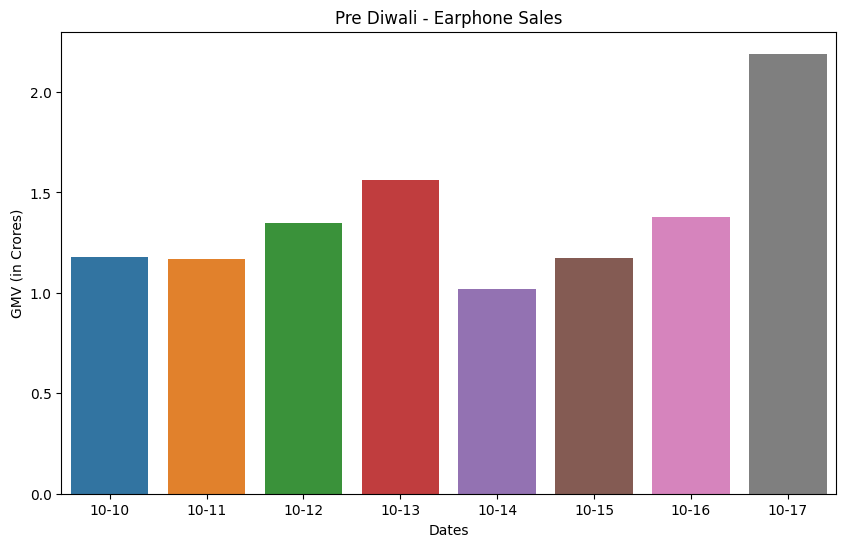

In [27]:
ear = by_cat_date.loc[(slice('Earphones'))][8:16]
ear_gmv_datewise = []
for i in range(8):
    ear_gmv_datewise.append((ear['ITEM_GMV']/10000000)[i])

plt.figure(figsize=(10,6))
ax = sns.barplot(x=dates,y=ear_gmv_datewise)
ax.set_title('Pre Diwali - Earphone Sales')
ax.set_xlabel('Dates')
ax.set_ylabel('GMV (in Crores)')

Text(0, 0.5, 'GMV (in Crores)')

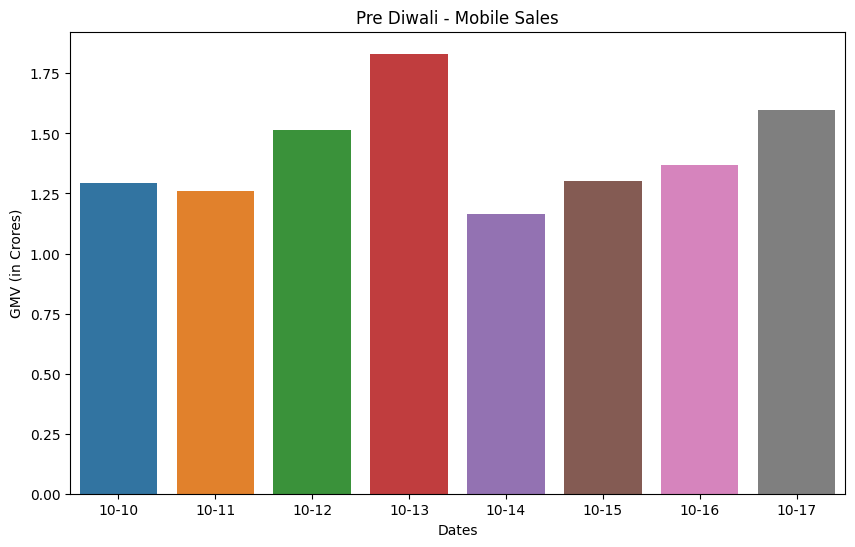

In [28]:
phone = by_cat_date.loc[(slice('Mobiles'))][24:32]
phone_gmv_datewise = []
for i in range(8):
    phone_gmv_datewise.append((phone['ITEM_GMV']/10000000)[i])

plt.figure(figsize=(10,6))
ax = sns.barplot(x=dates,y=phone_gmv_datewise)
ax.set_title('Pre Diwali - Mobile Sales')
ax.set_xlabel('Dates')
ax.set_ylabel('GMV (in Crores)')

Text(0, 0.5, 'GMV (in Crores)')

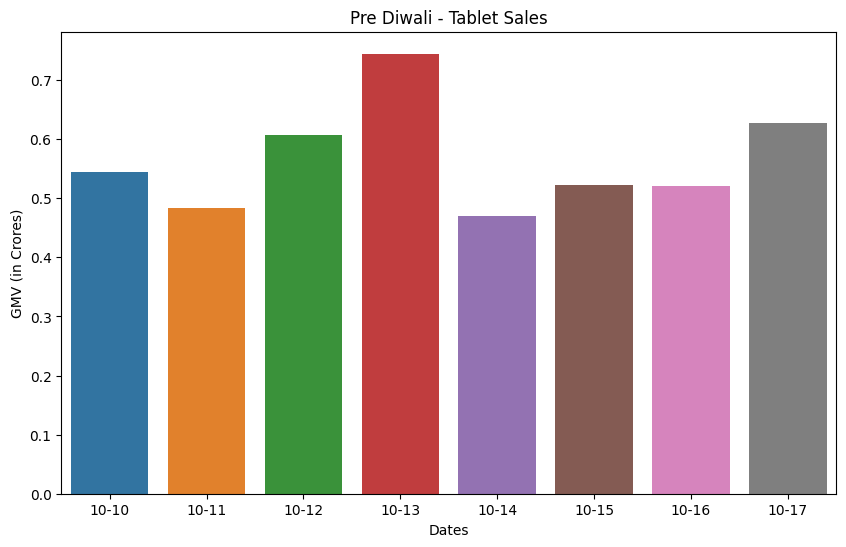

In [29]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=dates,y=by_cat_date.tail(8)['ITEM_GMV']/10000000)
ax.set_title('Pre Diwali - Tablet Sales')
ax.set_xlabel('Dates')
ax.set_ylabel('GMV (in Crores)')

In [30]:
qt_or = df[['QTY','ORDERS']]

In [31]:
qt_or['qty/order'] = qt_or['QTY']/qt_or['ORDERS']
qt_or['qty/order'].mean()

/var/folders/s4/rbw51hr572v983ntn5czj87h0000gn/T/ipykernel_40964/262303439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qt_or['qty/order'] = qt_or['QTY']/qt_or['ORDERS']


1.9439685613581794

In [32]:
df[df['CATEGORY']=='Earphones']['ITEM_GMV'].describe()

count     53892.000000
mean       2044.506782
std        2980.305514
min          50.000000
25%         750.000000
50%        1300.000000
75%        2300.000000
max      110700.000000
Name: ITEM_GMV, dtype: float64

<AxesSubplot:xlabel='ITEM_GMV', ylabel='Count'>

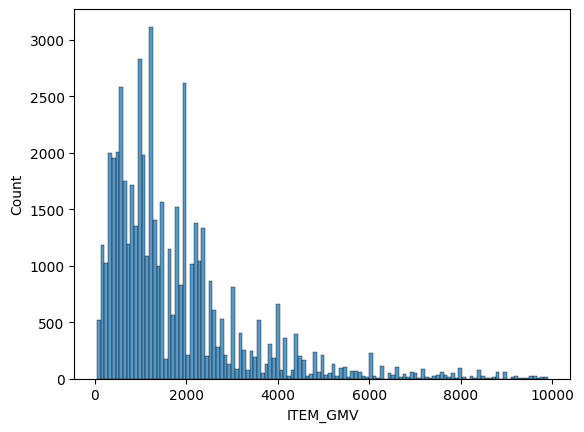

In [33]:
sns.histplot(df[(df['CATEGORY']=='Earphones') & (df['ITEM_GMV']<10000)]['ITEM_GMV'])

<AxesSubplot:ylabel='ITEM_GMV'>

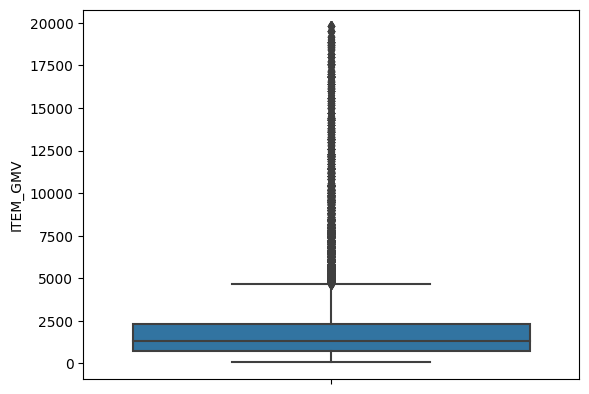

In [34]:
sns.boxplot(y=df[(df['CATEGORY']=='Earphones') & (df['ITEM_GMV']<20000)]['ITEM_GMV'])

In [35]:
df[(df['CATEGORY']=='Earphones') & (df['ITEM_GMV']>10000)].count()

DATE             875
SHOP_ID          875
PINCODE          875
SHOP             875
ITEM_ID          875
HR of the day    875
ORDERS           875
QTY              875
ITEM_GMV         875
CATEGORY         875
% CAT GMV        875
dtype: int64

<AxesSubplot:xlabel='ITEM_GMV', ylabel='Count'>

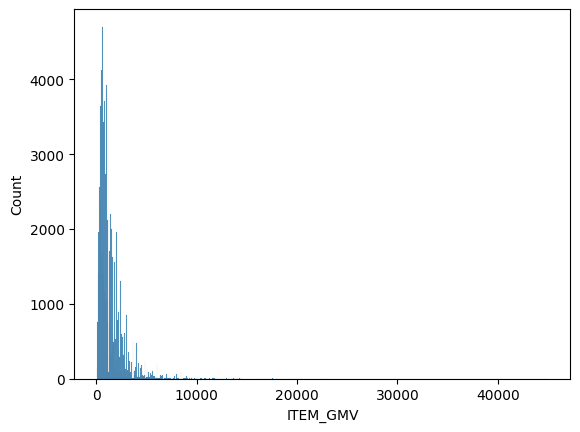

In [36]:
sns.histplot(df[(df['CATEGORY']=='Mobiles') & (df['ITEM_GMV']<50000)]['ITEM_GMV'])

<AxesSubplot:ylabel='ITEM_GMV'>

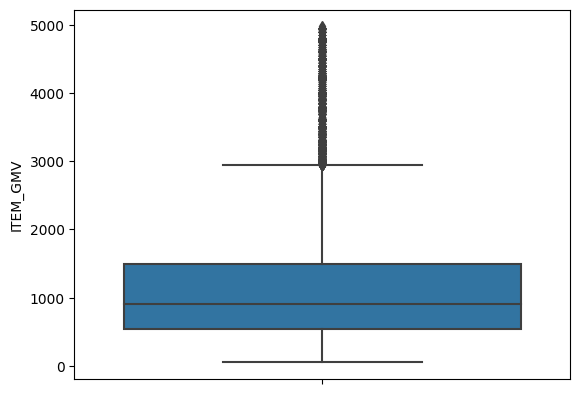

In [46]:
sns.boxplot(y=df[(df['CATEGORY']=='Mobiles') & (df['ITEM_GMV']<5000)]['ITEM_GMV'])

<AxesSubplot:xlabel='ITEM_GMV', ylabel='Count'>

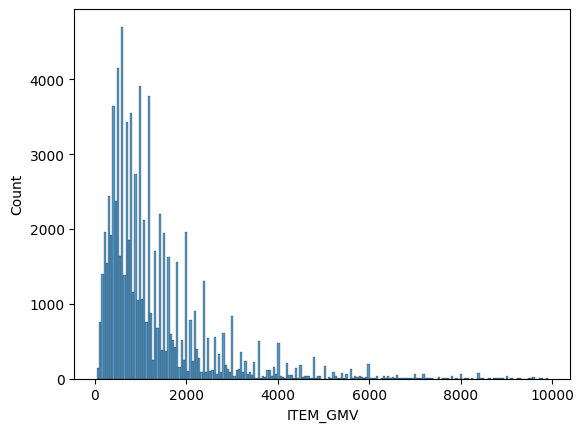

In [37]:
sns.histplot(df[(df['CATEGORY']=='Mobiles') & (df['ITEM_GMV']<10000)]['ITEM_GMV'])

<AxesSubplot:xlabel='ITEM_GMV', ylabel='Count'>

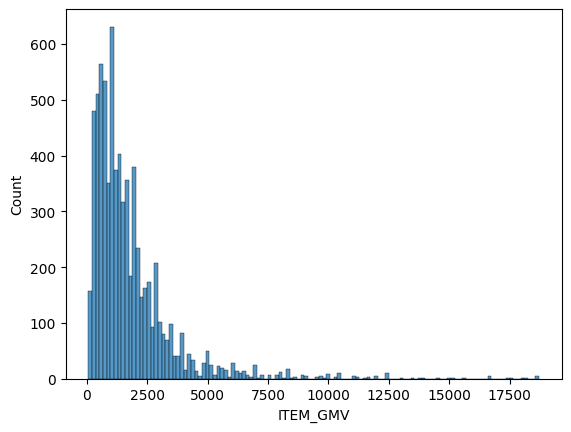

In [49]:
sns.histplot(df[(df['CATEGORY']=='Speakers') & (df['ITEM_GMV']<20000)]['ITEM_GMV'])

In [38]:
df[(df['CATEGORY']=='Mobiles')]['ITEM_GMV'].describe()

count    83759.000000
mean      1352.824792
std       1486.692881
min         50.000000
25%        550.000000
50%        973.200000
75%       1600.000000
max      53550.000000
Name: ITEM_GMV, dtype: float64

In [39]:
df[(df['CATEGORY']=='Mobiles') & (df['ITEM_GMV']>5000)].count()

DATE             2031
SHOP_ID          2031
PINCODE          2031
SHOP             2031
ITEM_ID          2031
HR of the day    2031
ORDERS           2031
QTY              2031
ITEM_GMV         2031
CATEGORY         2031
% CAT GMV        2031
dtype: int64

In [40]:
df[(df['CATEGORY']=='Tablets')]['ITEM_GMV'].describe()

count    27400.000000
mean      1649.776409
std       2064.484583
min         50.000000
25%        700.000000
50%       1200.000000
75%       1904.800000
max      57600.000000
Name: ITEM_GMV, dtype: float64

<AxesSubplot:xlabel='ITEM_GMV', ylabel='Count'>

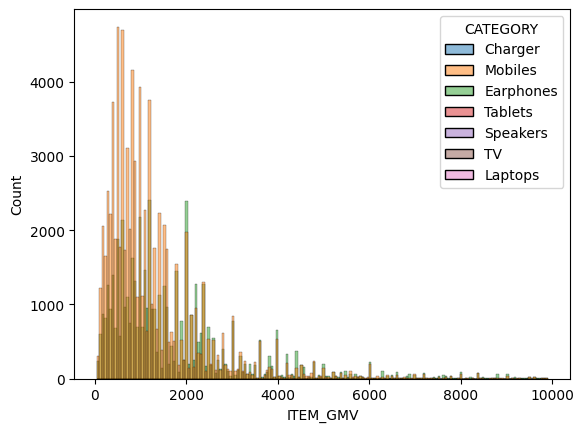

In [41]:
sns.histplot(data=df,x=df[(df['ITEM_GMV']<10000) & 
                          ((df['CATEGORY'] == 'Mobiles') | (df['CATEGORY']=='Earphones'))]
             ['ITEM_GMV'],hue=df['CATEGORY'])

In [42]:
sales = {'Category':['Earphones BD','Mobiles BD','Earphones AD','Mobiles AD'],
         'Value':[875,2031,3104,4082]}

compDf = pd.DataFrame.from_dict(sales)
compDf

,Category,Value
0,Earphones BD,875
1,Mobiles BD,2031
2,Earphones AD,3104
3,Mobiles AD,4082


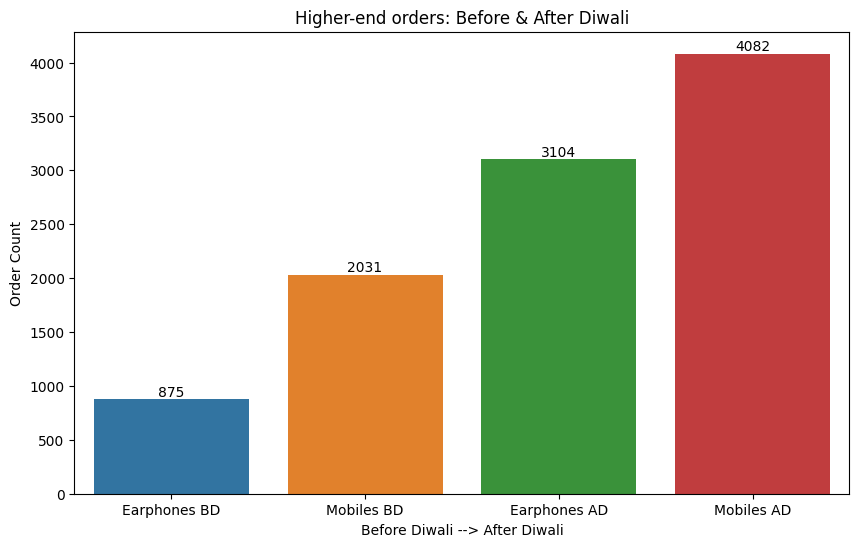

In [43]:
plt.figure(figsize=(10,6))
ax = sns.barplot(y='Value',x='Category',data=compDf)
ax.bar_label(ax.containers[0])
plt.title("Higher-end orders: Before & After Diwali")
plt.ylabel('Order Count')
plt.xlabel('Before Diwali --> After Diwali')
plt.show()